In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_bvp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Para la resolución de la ecuación de calor, se utilizan métodos afines de las diferencias finitas. Este método, surge de considerar los polinomios de Taylor centrados en puntos $x_0$ y pasos pequeños $h$ como para despreciar los términos con potencias mayores que 1 de $h$.

$$ u(x_0+h) \approx u(x_0) + \frac{h}{1!}u'(x_0)+O(h^2) $$
Despejando $u'(x_0)$:

$$ u'(x_0)\approx \frac{u(x_0+h)-u(x_0)}{h} $$
Lo que se conoce como diferencias finitas hacia enfrente.
Similarmente, podemos encontrar una expresión para $u'(x_0)$ utilizando $u(x_0-h)$:

$$ u'(x_0)\approx \frac{u(x_0)-u(x_0-h)}{h} $$
Lo que es diferencias finitas hacia atrás.
Promedindo las ecuaciones anteriores, terminamos con:

$$ u'(x_0)\approx \frac{u(x_0+h)-u(x_0-h)}{2h} $$

Podemos obtener un resultado similar para una derivada de orden 2, mediante diferencias finitas hacia enfrente:

$$ u''(x_0)\approx\frac{u'(x_0+h)-u'(x_0)}{h} $$

Podemos ver a $u'(x_0+h)$ mediante diferencias finitas hacia atrás, y a $u'(x_0)$ hacia atrás:

\begin{align*}
u'(x_0+h) &\approx \frac{u(x_0+h)-u(x_0)}{h}\\
u'(x_0) &\approx \frac{u(x_0)-u(x_0-h)}{h}
\end{align*}

Sustituyendo, obtenemos:

$$ u''(x_0)\approx \frac{u(x_0+h)-2u(x_0)+u(x_0-h)}{h^2} $$

***Ejemplo***

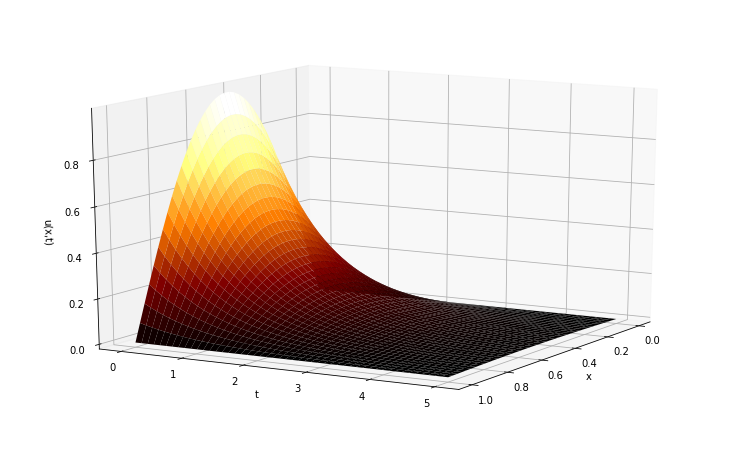

In [ ]:
# Declaramos la función de la derivada temporal, utilizando la expresión de diferencias finitas de segundo orden
# de manera que se barren primeramente el eje x y luego se integra respecto del tiempo.
def func(u, t, x, N, h):
  dudt=np.zeros(x.shape)
  kappa=0.1

  dudt[0]=dudt[-1]=0
  for k in range(1,N-1):
    dudt[k]=kappa*((u[k+1]-2*u[k]+u[k-1])/h**2)
  return dudt

# Parámetros
N=40 #Número de pasos espaciales
a=0 #Lim. Inferior
b=1 #Lim. Superior
# Tiempos inicial y final
ti=0.0 
tf=5.0

# Espaciamiento en x y matrices de valores de espacio y tiempo
h=(b-a)/(N-1)
x=np.linspace(a,b,N)
t=np.linspace(ti,tf,50)

# Condiciones iniciales
x0=np.sin(np.pi*x)
x0[x0<0]=0

# Solución de la ecuación de calor.
sol=odeint(func,x0,t,args=(x,N,h))

#Graficación de la solución en el espacio.
fig=plt.figure(figsize=(13,8))
ax = fig.add_subplot(111,projection='3d')
sx, st = np.meshgrid(x,t)

ax.plot_surface(sx,st,sol,cmap='afmhot',rstride=1,cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.view_init(elev=15,azim=30)
plt.show()

**Ejercicio 1:**

Resuelva la Ecuación del calor, usando el método anterior para el siguiente caso:

**Caso a)** 

Una barra metálica de longitud $L=10$, y coeficiente de difusión $\kappa=100$.
Condición inicial (Temperatura dentro de la barra): u(x,0) = 0.

Condiciones a la frontera: u(0,t)=10, u(L,t)=0.

Realice los cálculos hasta alcanzar el equilibrio térmico.





dt/dx**2 < 0.5? 0.003999999999999999


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'lw'


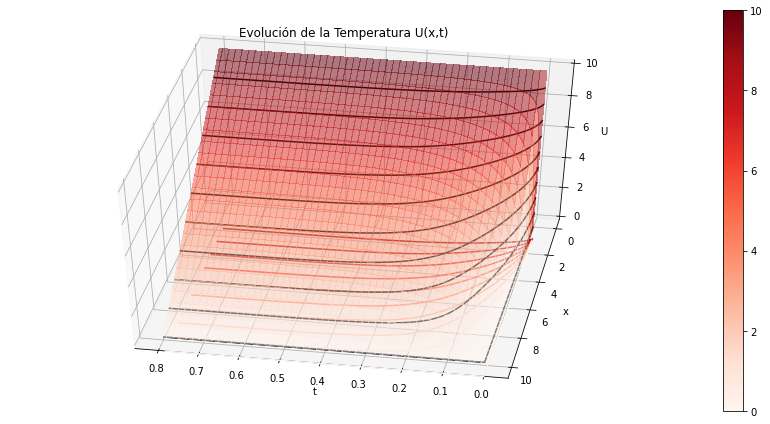

In [ ]:
x0 = 0
xL = 10

t0 = 0
tF = 0.8

M = 51 
N = 5001

dx = (xL - x0)/(M-1)
dt = (tF - t0)/(N-1)

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

print('dt/dx**2 < 0.5?', dt/dx**2)


kappa = 100
alpha = kappa * dt / dx**2


U = np.zeros((M, N))


U[:, 0] = 0 


U[0, :] = 10 
U[-1, :] = 0 



for k in range(0, N-1):
  for j in range(1, M-1):
    U[j, k+1] = alpha * U[j-1, k] + (1 - 2*alpha) * U[j, k] + alpha * U[j+1, k]


T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))


ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U , cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)



ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)



m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)



ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t)')


ax.view_init(elev=45, azim=100)

plt.tight_layout()
plt.show()


**Caso b)** 

Un material de longitud $L=10$ con coeficiente de difusión térmica $\kappa=0.25$

Condición inicial u(x,0)=20.

Condiciones a la frontera: u(0,t)=(20 + 10 sin(pi*t/12), u(L,t)=20.

Realice los cálculos para t=(0,48)

Pueden ajustar los parámetros para ver cómo cambia la temperatura dentro del cuerpo.


k/h^2 < 1/2 ? 0.22281370849446594 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'lw'


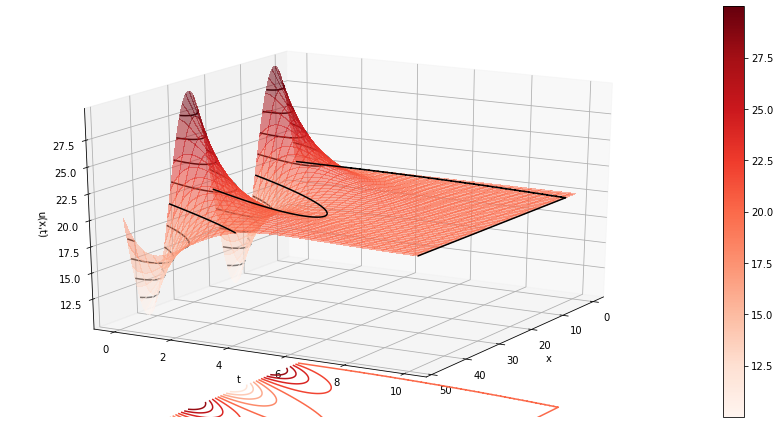

In [ ]:

a=0.0  
b=10.0


ti=0.0
tf=48.0


M=60  
N=7500  

 
x=np.linspace(a,b,M)
t=np.linspace(ti,tf,N)

 
h=(b-a)/(M-1)
k=(tf-ti)/(N-1)
 

print('k/h^2 < 1/2 ?', k/h**2,'\n')
kappa=0.25
alpha=kappa*k/h**2


u=np.zeros((M,N))
u[:,0]=np.zeros(x.shape)+20
u[0,:]=20+10*np.sin(np.pi*t/12)
u[-1,:]=20


for n in range(0,N-1):
  for m in range(1,M-1):
      u[m,n+1]=alpha*u[m+1,n]+(1-2*alpha)*u[m,n]+alpha*u[m-1,n]


T, X = np.meshgrid(t,x)

fig=plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, u, cmap='Reds',linewidth=0.01, antialiased=False,alpha=0.5)

ax.contour(T, X, u, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, u, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

m = plt.cm.ScalarMappable(cmap='Reds')
m.set_array(u)
plt.colorbar(m)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.view_init(elev=20,azim=30)
plt.tight_layout()
plt.show()

**Problema 2:**

**Variaciones de la Temperatura en el Suelo**

La superficie de la Tierra recibe radiación solar durante el día. Esta Energía la transforma en calor, y cambia la temperatura dentro del suelo. Por la noche al no recibir radiación solar la emite a la atmósfera. 

Si suponemos que la temperatura del suelo varía con la profundidad, podemos suponer que tenemos un problema unidimensional, siendo el eje $x$ la dirección hacia dentro del suelo.

A cierta profundidad $x=L$, suponemos que la temperatura ya no cambia, es decir $\partial u/\partial x = 0$ (Condición de Neumann).

Supondremos que la variación de la temperatura en la superficie terrestre varía como 

\begin{equation*}
u(0,t) = u_0 + u_a \sin (\frac{2\pi t}{P})
\end{equation*}

donde $u_0$ es la inical temperatura promedio del suelo y $u_a$ es la temperatura del aire. La constante $P$ es el periodo de variación diaria de temperatura $P=24 h=86,400 s$.

En este caso la constante de difusión de calor es $\kappa = 1.0 \times 10^{-6}$. El tiempo será medido en segundos. 

Usando la Ecuación de Calor, determina numéricamente  la variación del perfil de temperatura dentro del suelo, por ejemplo para Hermosillo en estos días supongamos que $u_0=15ºC$, $u_a= 20ºC$.

Realiza una simulación de al menos 48 horas. 



alpha < 0.5 ?  0.00038753279999999995 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


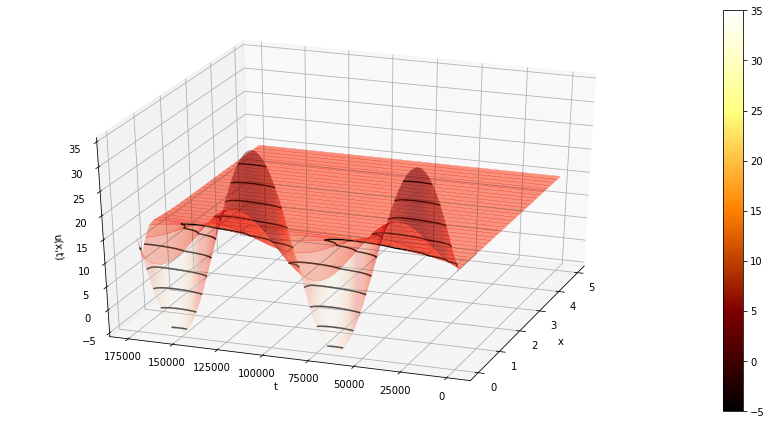

In [ ]:

xi=0.0
xf=5.0

ti=0.0
tf=172800.0

Nspace = 30
Ntime = 15001

dx=(xf-xi)/(Nspace-1)
dt=(tf-ti)/(Ntime-1)

kappa = 1e-6
u_0=15.0
u_a=20.0
P=86400.0


alpha = kappa*dt/dx**2
print('alpha < 0.5 ? ',alpha,'\n')


x=np.linspace(xi,xf,Nspace)
t=np.linspace(ti,tf,Ntime)


u=np.zeros((Nspace,Ntime))


u[0,:]=u_0+u_a*np.sin(2*np.pi*t/P)
u[-1,:]=u_0*np.ones(t.shape)
u[:,0]=u_0


for k in range(0,Ntime-1):
  for j in range(1,Nspace-1):
    u[j,k+1]=alpha*u[j+1,k]+(1-2*alpha)*u[j,k]+alpha*u[j-1,k]


T, X = np.meshgrid(t,x)

fig=plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X,T,u,cmap='Reds',rstride=1, cstride=1, alpha=0.5)

ax.contour(X,T,u,10,lw=1,colors='k',linestyles='solid')


m=cm.ScalarMappable(cmap='afmhot')
m.set_array(u)
plt.colorbar(m)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.view_init(elev=30,azim=200)
plt.tight_layout()
plt.show()

In [ ]:
dsfdsfdsfsdfsdf

NameError: ignored